In [54]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# About the data

* Objective: Classification of spearheads from the Sahara desert

* Data:
    * 75 samples: 63 for training, 12 for testing
    * 10 chemical elements

* Procedure
    * Plotting raw data
    * PCA
    * Interpretation of scores and loadings
    * Finding the optimal nnumber of PCs

In [55]:
filename='data/Arch.txt'
df=pd.read_csv(filename,sep=",")

In [56]:
df.head()

,Unnamed: 0,A,B,C,D,Class,Fe,Ti,Ba,Ca,K,Mn,Rb,Sr,Y,Zr
0,A#1,1,0,0,0,A,1100,390,55,920,460,45,120,57,58,142
1,A#2,1,0,0,0,A,1173,417,54,961,441,47,135,55,60,145
2,A#3,1,0,0,0,A,1164,404,56,916,446,42,120,58,45,148
3,A#4,1,0,0,0,A,1030,373,59,920,487,38,128,53,58,138
4,A#5,1,0,0,0,A,1077,373,55,888,455,38,97,51,54,145


In [57]:
df.head(100)
dataX=df[['Fe','Ti','Ba','Ca','K','Mn','Rb','Sr','Y','Zr']]
X=dataX.values
print("Shape of X is ", X.shape)
scaler=StandardScaler()
scaler.fit(X)
Xstd=scaler.transform(X)

Shape of X is  (75, 10)


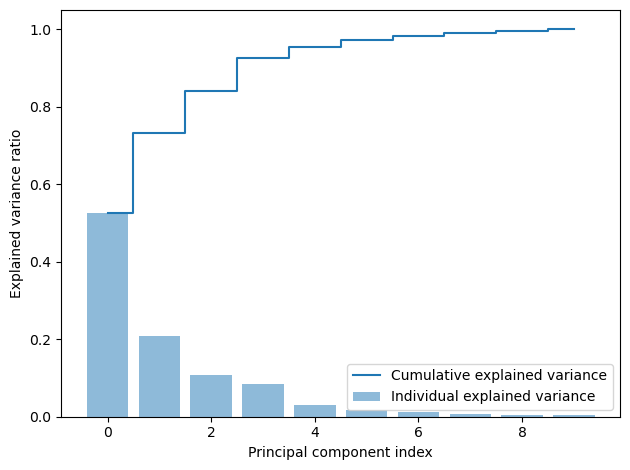

In [58]:
pca = PCA()
# Determine transformed features
X_train_pca = pca.fit_transform(Xstd)
# Determine explained variance using explained_variance_ration_ attribute
exp_var_pca = pca.explained_variance_ratio_
# Cumulative sum of eigenvalues; This will be used to create step plot
# for visualizing the variance explained by each principal component.
cum_sum_eigenvalues = np.cumsum(exp_var_pca)
# Create the visualization plot
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

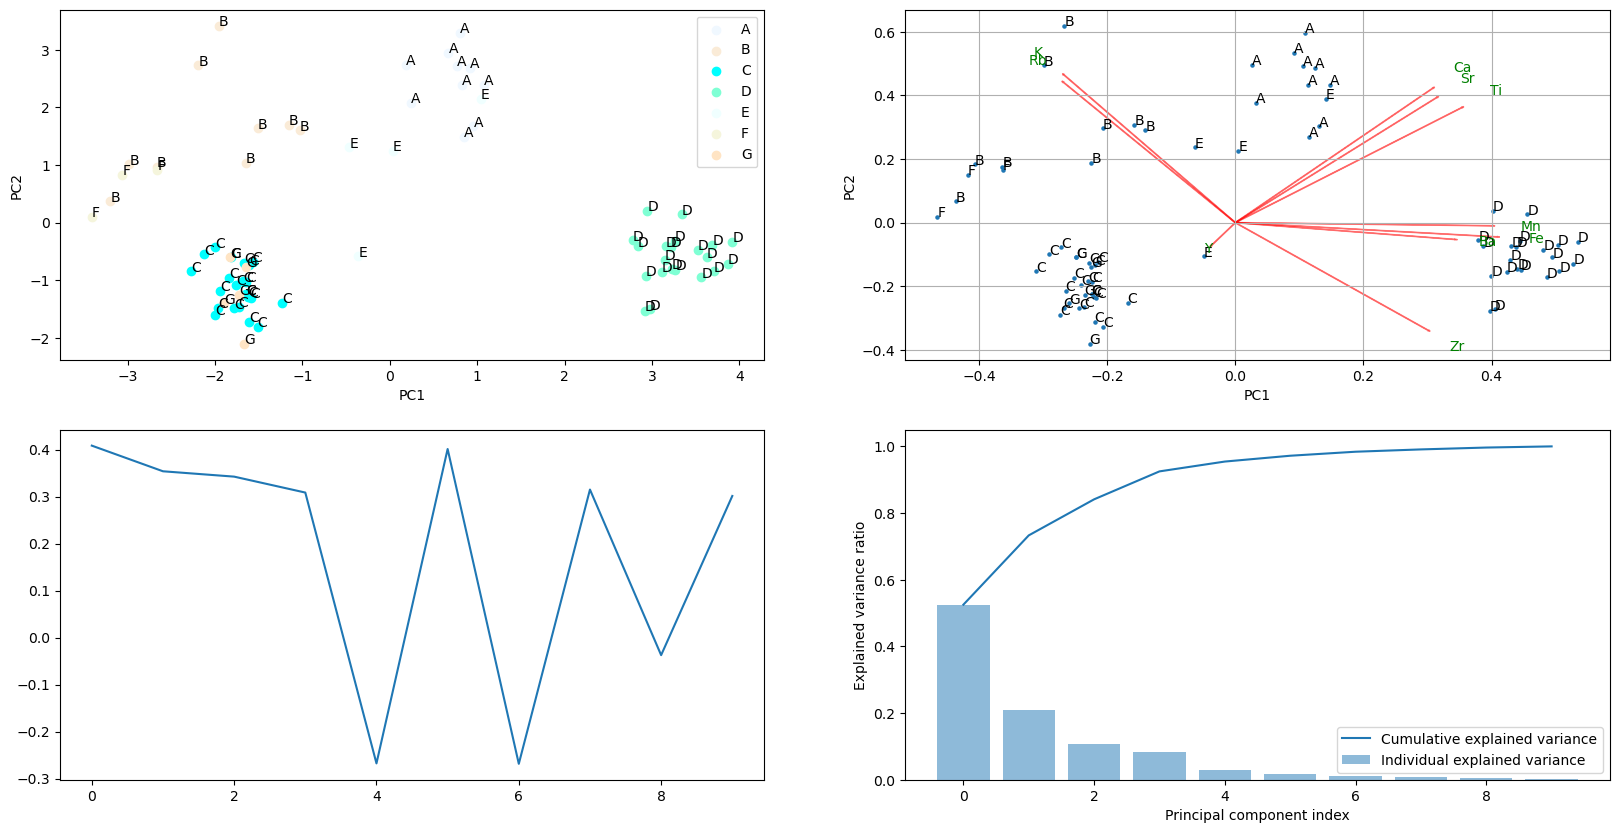

In [76]:
import matplotlib.pyplot as plt
import matplotlib as matplotlib

colors = dict(zip(df['Class'].unique(),
                  (f'{c}' for c in matplotlib.colors.cnames.values())))
category=df['Class'].values
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))
# first plot
for cls in df['Class'].unique():
    axs[0,0].scatter(X_train_pca[df['Class']==cls, 0], X_train_pca[df['Class']==cls, 1], color=colors[cls], label=cls)
    
for i in range(75):
    txt=category[i]
    axs[0,0].annotate(txt, (X_train_pca[i, 0], X_train_pca[i, 1]))
axs[0,0].set_xlabel("PC1")
axs[0,0].set_ylabel("PC2")
axs[0,0].legend()

# second plot
def myplot(score, coeff, labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    #axs[1].scatter(xs * scalex, ys * scaley, s=5)
    axs[0,1].scatter(xs * scalex, ys * scaley, s=5)
    for i in range(75):
        txt=category[i]
        axs[0,1].annotate(txt, (xs[i] * scalex, ys[i] * scaley))

    for i in range(n):
        axs[0,1].arrow(0, 0, coeff[i,0], coeff[i,1], color='r', alpha=0.5)
        if labels is None:
            axs[0,1].text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color='green', ha='center', va='center')
        else:
            axs[0,1].text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color='g', ha='center', va='center')
 
    axs[0,1].set_xlabel("PC{}".format(1))
    axs[0,1].set_ylabel("PC{}".format(2))
    axs[0,1].grid()

myplot(X_train_pca[:,0:2], np.transpose(pca.components_[0:2, :]), list(dataX.columns.values))

axs[1,0].plot(np.transpose(pca.components_[0, :]),label='loading PC1')

axs[1,1].bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
axs[1,1].plot(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, label='Cumulative explained variance')
axs[1,1].set_ylabel('Explained variance ratio')
axs[1,1].set_xlabel('Principal component index')
axs[1,1].legend(loc='best')


plt.show()